In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
def func(X, b = 20, q = 0.1, w = 10):
    return b*(1-np.exp(-0.5*w*(X[0]**2+X[1]**2))) + 0.5*q*(-X[0]**3 + X[1])**2

def gradx(X, b = 20, q = 0.1, w = 10):
    return b*np.exp(-0.5*w*(X[0]**2+X[1]**2)) *w*X[0] - 3*q*X[0]**2*(-X[0]**3 + X[1])

def grady(X, b = 20, q = 0.1, w = 10):
    return b*np.exp(-0.5*w*(X[0]**2 + X[1]**2))*w*X[1] + q*(-X[0]**3 + X[1])

def grad(X):
    return [gradx(X), grady(X)]

In [3]:
print(func([0.2,0.2]))

6.595442279287216


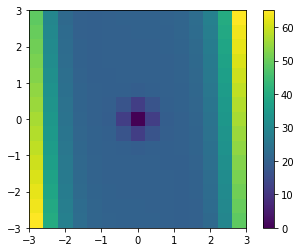

In [4]:
x = np.linspace(-3, 3, 15)
y = np.linspace(-3, 3, 15)

X = np.meshgrid(x, y)
plt.imshow(func(X), extent=[-3, 3, -3, 3])
plt.colorbar()
plt.show()

In [30]:
# Vanilla GD
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    start = time.time()
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,3])
    param_traj[0,]=[init[0], init[1], 0]
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=[params[0], params[1], time.time()-start]

    return param_traj

# Momentum GD
def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

# NAG
def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#RMS_PROP
def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
#ADAM                       
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    grad_sq=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

In [41]:
def minResults(x,y,eta,epochs,minfunc):
    print('Minimize with eta = ' + str(eta))
    Results = pd.DataFrame()
    count = 0
    for i in x:
        count += 1
        print(count)
        for j in y:
            Xf = minfunc(grad, np.array([i,j]), eta = eta, n_epochs = epochs)
            Results[str(i) + " " + str(j)] = func(Xf[:,:2].T)
            Results['time' +  str(i) + str(j)] = pd.Series(Xf[:,2]) 
    return Results

[[-3.00000000e+00  3.00000000e+00  0.00000000e+00]
 [-2.99190000e+00  2.99970000e+00  9.87768173e-04]
 [-2.98390233e+00  2.99940218e+00  9.87768173e-04]
 ...
 [-1.51486711e+00  2.89116862e+00  5.79895973e-02]
 [-1.51442874e+00  2.89110494e+00  5.79895973e-02]
 [-1.51399083e+00  2.89104130e+00  5.79895973e-02]]


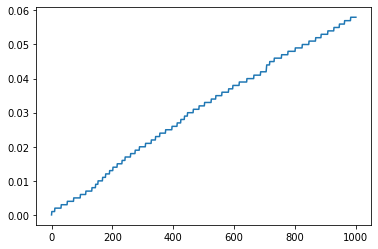

In [48]:
Xf = gd(grad, [-3, 3])
print(Xf)
plt.plot(Xf[:,2])

In [39]:
eta = [0.01, 0.001, 0.0001]

In [42]:
Resultsgd = pd.DataFrame()
for e in eta:
    Resultsgd['eta = ' + str(e)] = minResults(x, y, e, 2000, gd).mean(axis=1)

plt.plot(Resu)
plt.show()

Minimize with eta = 0.01
1
2
3


KeyboardInterrupt: 

In [36]:
print(Resultsgd)

   eta = 0.01  eta = 0.001  eta = 0.0001
0   27.502115    27.502115     27.502115
1   21.878938    26.625108     27.410234


Minimize with eta = 0.01
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.0001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


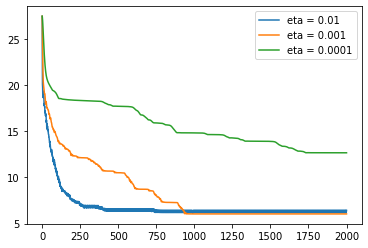

In [21]:
Resultsgd_mom = pd.DataFrame()
for e in eta:
    Resultsgd_mom['eta = ' + str(e)] = minResults(x, y, e, 2000, gd_with_mom).mean(axis=1)

Resultsgd_mom.plot()
plt.show()

Minimize with eta = 0.01
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.0001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


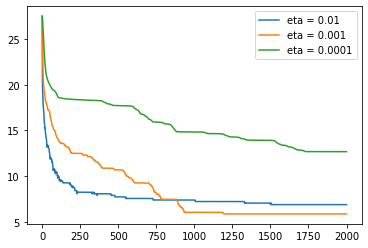

In [18]:
ResultsNAG = pd.DataFrame()
for e in eta:
    ResultsNAG['eta = ' + str(e)] = minResults(x, y, e, 2000, NAG).mean(axis=1)

ResultsNAG.plot()
plt.show()

Minimize with eta = 0.01
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.0001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


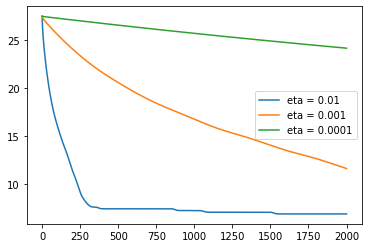

In [19]:
Resultsrms = pd.DataFrame()
for e in eta:
    Resultsrms['eta = ' + str(e)] = minResults(x, y, e, 2000, rms_prop).mean(axis=1)

Resultsrms.plot()
plt.show()

Minimize with eta = 0.01
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Minimize with eta = 0.0001
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


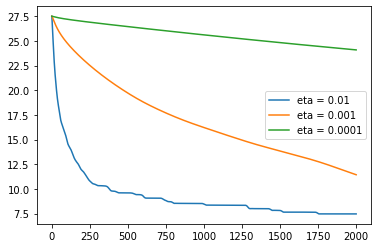

In [20]:
Resultsadams = pd.DataFrame()
for e in eta:
    Resultsadams['eta = ' + str(e)] = minResults(x, y, e, 2000, adams).mean(axis=1)

Resultsadams.plot()
plt.show()